# Курсовая работа № 2
## Аналитика. Начальный уровень




Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

<br><br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruting_costs`, `salary_grid`.

In [307]:
import psycopg2
import pandas as pd
from matplotlib import pyplot as plt
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)

df1 = pd.read_sql_query('SELECT AVG("Pay Rate") avg_pay_rate, avg("perf_scoreid") perfomance, sex FROM hr_dataset Group By sex', conn)
df2 = pd.read_sql_query('SELECT MAX("Pay Rate") as Max_pay_rate, racedesc as race, COUNT(id) FROM hr_dataset GROUP BY race ORDER BY Max_pay_rate DESC', conn)
df3 = pd.read_sql_query ('SELECT AVG("Days Employed") AS Avg_days_employed,maritaldesc as Marital_status FROM hr_dataset GROUP BY Marital_status', conn)
df4 = pd.read_sql_query ('SELECT AVG(perf_scoreid) as Avg_perf_score, "Manager Name", COUNT(id) FROM hr_dataset GROUP BY "Manager Name" ORDER BY Avg_perf_score desc', conn)

In [308]:
#Проверим гипотезу зависимости заработной платы от пола сотрудника
df1

,avg_pay_rate,perfomance,sex
0,29.472147,3.621469,Female
1,33.697143,3.240602,Male


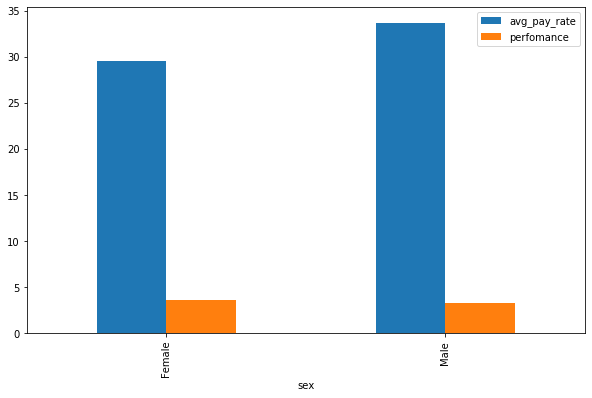

In [309]:
plt.rcParams["figure.figsize"] = [10, 6]
df1.plot.bar(x='sex')

**Средняя з/п женщин меньше, чем средняя з/п мужчин по выборке, однако показатель производительности выше у женщин**

In [310]:
#Проверим гипотезу зависимости максимальной заработной платы от расовой принадлежности сотрудника
df2

,max_pay_rate,race,count
0,80.0,White,193
1,65.0,Black or African American,57
2,63.0,Hispanic,4
3,56.0,American Indian or Alaska Native,4
4,56.0,Asian,34
5,55.5,Two or more races,18


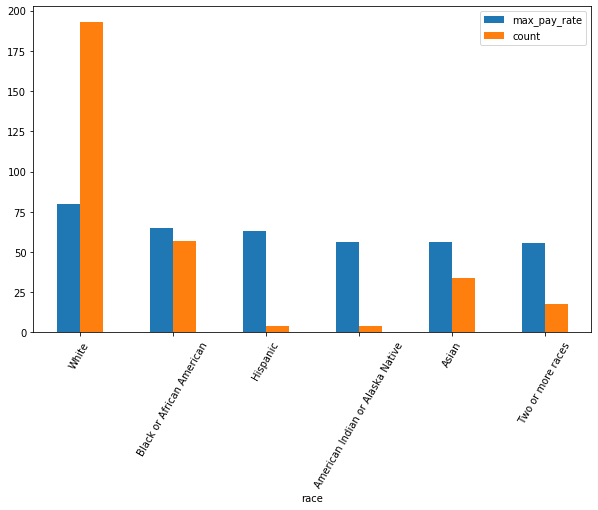

In [311]:
ax = df2.plot.bar(x='race', rot=60)

**Наблюдается зависимость максимальной з/п от количества сотрудников, преобладание европиоидной расы - следовательно максимальная зп - выше, минимальные показатели у людей смешанного происхождения**

In [312]:
#Проверим гипотезу зависимости длительности работы сотрудника в компании от семейного положения
df3

,avg_days_employed,marital_status
0,863.000000,Widowed
1,1246.235772,Married
2,1703.416667,Separated
3,1372.751825,Single
4,1102.866667,Divorced


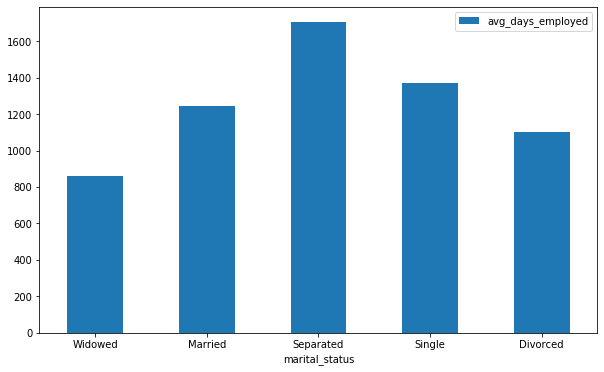

In [313]:
ax = df3.plot.bar(x='marital_status', rot=0)

**Наибольший средний период работы имеют сотрудники, живующие раздельно со своей семьей, возможно в виду отсутствия семейных забот и необходимости поиска партнера, наименьший показатель у овдовевших сотрудников, средние показатели у категорий "В браке, свободен, разведен**

In [314]:
#Проверим гипотезу зависимости производственного показателя сотрудника и сотрудника, под чьим руководством он работает
df4

,avg_perf_score,Manager Name,count
0,4.500000,Peter Monroe,14
1,4.380952,Amy Dunn,21
2,4.363636,Michael Albert,22
3,4.285714,Brandon R. LeBlanc,7
4,4.047619,David Stanley,21
5,3.764706,Simon Roup,17
6,3.454545,Elijiah Gray,22
7,3.428571,Webster Butler,21
8,3.333333,Ketsia Liebig,21
9,3.285714,Jennifer Zamora,7


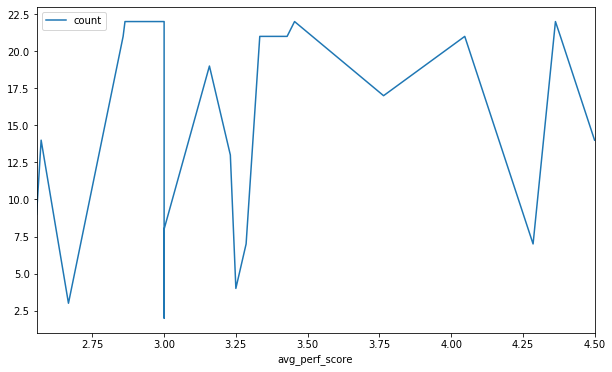

In [315]:
df4[['avg_perf_score', 'count']].plot(x='avg_perf_score', y='count')

**Наилучший показатель у сотрудников с руководителем "Peter Monroe", в целом у нас есть менеджеры, подчинённые которых имеют низкий перформанс, и менеджеры, перформанс подчинённых которых высок. Но мы не видим зависимости между количеством подчинённых у менеджера и средним их перформансом**